### Base sobre informações globais
Essa base foi pega do kaggle para uma análise exploratória.
https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

#### O quê o desafio quer?
<ul>
    <li>Investigar a relação entre terras agrícolas e segurança alimentar.</li>
    <li>Explore correlações entre indicadores econômicos, como o PIB, e vários fatores socioeconômicos.</li>
    <li>Verificar qual o idioma mais falado.</li>
    <li>Analise métricas de saúde, como mortalidade infantil e expectativa de vida, para avaliar o bem-estar geral.</li>
</ul>

In [1]:
#Importando bibliotecas que serão usadas
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
import altair as alt
import warnings

In [2]:
#Importando o Pandas
import pandas as pd 
#Passando a variável world_info_df
world_info_df = pd.read_csv('world-data-2023.csv')

In [3]:
#Passando os nomes das colunas para português
colunas = ['País', 'Densidade (P/Km2)', 'Abreviatura', 'Terra Agrícola (%)', 'Área Terrestre (Km2)', 'Tamanho das Forças Armadas', 'Taxa de natalidade', 'Código de chamada', 'Capital/Cidade Principal', 'Emissões de CO2', 'IPC', 'Variação do IPC (%)', 'Currency_Code', 'Taxa de fertilidade ', 'Área Florestada (%)', 'Gasoline_Price', 'PIB ', 'Matrícula bruta no ensino primário (%)', 'Matrícula bruta no ensino superior (%)', 'Mortalidade Infantil ', 'Maior Cidade', 'Expectativa de vida', 'Razão de Mortalidade Materna', 'Salário Mínimo', 'Idioma Oficial', 'Despesas Desembolsadas com Saúde (%)', 'Médicos por Mil', 'População', 'População: Participação na Força de Trabalho (%)', 'Receita Fiscal (%)', 'Taxa Total de Imposto', 'Taxa de Desemprego', 'População Urbana', 'Latitude ', 'Longitude']
world_info_df.columns = colunas

In [4]:
#Mostrando as 5 primeiras linhas da base
world_info_df.head()

,País,Densidade (P/Km2),Abreviatura,Terra Agrícola (%),Área Terrestre (Km2),Tamanho das Forças Armadas,Taxa de natalidade,Código de chamada,Capital/Cidade Principal,Emissões de CO2,...,Despesas Desembolsadas com Saúde (%),Médicos por Mil,População,População: Participação na Força de Trabalho (%),Receita Fiscal (%),Taxa Total de Imposto,Taxa de Desemprego,População Urbana,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [5]:
#Puxando informações da base
world_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   País                                              195 non-null    object 
 1   Densidade (P/Km2)                                 195 non-null    object 
 2   Abreviatura                                       188 non-null    object 
 3   Terra Agrícola (%)                                188 non-null    object 
 4   Área Terrestre (Km2)                              194 non-null    object 
 5   Tamanho das Forças Armadas                        171 non-null    object 
 6   Taxa de natalidade                                189 non-null    float64
 7   Código de chamada                                 194 non-null    float64
 8   Capital/Cidade Principal                          192 non-null    object 
 9   Emissões de CO2      

In [37]:
#Passando a lista de colunas com dtype incorreto
lista_colunas_float = world_info_df[['Densidade (P/Km2)','Terra Agrícola (%)', 
'Área Terrestre (Km2)', 'Tamanho das Forças Armadas',
'Emissões de CO2', 'IPC', 'Variação do IPC (%)', 'Área Florestada (%)',
'Gasoline_Price', 'PIB ', 'Matrícula bruta no ensino primário (%)', 
'Matrícula bruta no ensino superior (%)', 'Salário Mínimo', 'Despesas Desembolsadas com Saúde (%)', 
'População', 'População: Participação na Força de Trabalho (%)', 
'Receita Fiscal (%)', 'Taxa Total de Imposto', 'Taxa de Desemprego', 'População Urbana']]
#Passando o dtype correto para essas colunas
for i in lista_colunas_float:
    world_info_df[i]= world_info_df[i].astype(str)
    world_info_df[i]= world_info_df[i].str.replace(",","")
    world_info_df[i]= world_info_df[i].str.replace("$","")
    world_info_df[i]= world_info_df[i].str.replace("%","").astype(float)

#Serve para suprimir uns avisos que aparecem junto com o resultado
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
#Usei para verificar se os dtypes tinham sido ajustados
world_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   País                                              195 non-null    object 
 1   Densidade (P/Km2)                                 195 non-null    float64
 2   Abreviatura                                       188 non-null    object 
 3   Terra Agrícola (%)                                188 non-null    float64
 4   Área Terrestre (Km2)                              194 non-null    float64
 5   Tamanho das Forças Armadas                        171 non-null    float64
 6   Taxa de natalidade                                189 non-null    float64
 7   Código de chamada                                 194 non-null    float64
 8   Capital/Cidade Principal                          192 non-null    object 
 9   Emissões de CO2      

In [8]:
#Observando se os nomes dos países estão ok
world_info_df['País'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Ivory Coast',
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Republic of the Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemal

In [9]:
#Passando o valor estranho na coluna de país para np.nan
world_info_df['País'] = world_info_df['País'].str.replace("S�����������", "")
world_info_df['País'] = world_info_df['País'].replace('', np.nan)

In [10]:
#contagem dos valores nulos em cada coluna
world_info_df.isnull().sum()

País                                                 1
Densidade (P/Km2)                                    0
Abreviatura                                          7
Terra Agrícola (%)                                   7
Área Terrestre (Km2)                                 1
Tamanho das Forças Armadas                          24
Taxa de natalidade                                   6
Código de chamada                                    1
Capital/Cidade Principal                             3
Emissões de CO2                                      7
IPC                                                 17
Variação do IPC (%)                                 16
Currency_Code                                       15
Taxa de fertilidade                                  7
Área Florestada (%)                                  7
Gasoline_Price                                      20
PIB                                                  2
Matrícula bruta no ensino primário (%)               7
Matrícula 

In [11]:
#Verificando os a quantidade de valores diferentes em cada coluna
world_info_df.nunique()

País                                                194
Densidade (P/Km2)                                   137
Abreviatura                                         188
Terra Agrícola (%)                                  168
Área Terrestre (Km2)                                194
Tamanho das Forças Armadas                          105
Taxa de natalidade                                  170
Código de chamada                                   182
Capital/Cidade Principal                            192
Emissões de CO2                                     184
IPC                                                 175
Variação do IPC (%)                                  86
Currency_Code                                       133
Taxa de fertilidade                                 139
Área Florestada (%)                                 161
Gasoline_Price                                      101
PIB                                                 193
Matrícula bruta no ensino primário (%)          

In [12]:
#Puxando a descrição da base
world_info_df.describe()

,Densidade (P/Km2),Terra Agrícola (%),Área Terrestre (Km2),Tamanho das Forças Armadas,Taxa de natalidade,Código de chamada,Emissões de CO2,IPC,Variação do IPC (%),Taxa de fertilidade,...,Despesas Desembolsadas com Saúde (%),Médicos por Mil,População,População: Participação na Força de Trabalho (%),Receita Fiscal (%),Taxa Total de Imposto,Taxa de Desemprego,População Urbana,Latitude,Longitude
count,195.000000,188.000000,1.940000e+02,1.710000e+02,189.000000,194.000000,1.880000e+02,178.000000,179.000000,188.000000,...,188.000000,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02,194.000000,194.000000
mean,356.764103,39.117553,6.896244e+05,1.592749e+05,20.214974,360.546392,1.777992e+05,190.460955,6.722346,2.698138,...,32.637234,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07,19.092351,20.232434
std,1982.888967,21.783052,1.921609e+06,3.806288e+05,9.945774,323.236419,8.387903e+05,397.947380,24.450414,1.282267,...,19.172697,1.684261,1.450924e+08,10.502907,6.961632,20.557662,5.079216,7.543050e+07,23.961779,66.716110
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242
25%,35.500000,21.700000,2.382825e+04,1.100000e+04,11.300000,82.500000,2.304250e+03,113.885000,1.000000,1.705000,...,17.450000,0.332500,1.962678e+06,56.150000,11.700000,30.600000,3.395000,1.152961e+06,4.544175,-7.941496
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,...,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,216.500000,55.375000,5.242560e+05,1.420000e+05,28.750000,506.750000,6.388425e+04,157.265000,4.250000,3.597500,...,43.975000,2.935000,2.858549e+07,69.500000,21.100000,48.000000,9.490000,1.490324e+07,40.124603,48.281523
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,...,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


Investigar a relação entre terras agrícolas e segurança alimentar


In [13]:
#Verificando valores nulo na coluna de terra agrícola
world_info_df[world_info_df['Terra Agrícola (%)'].isnull()]

,País,Densidade (P/Km2),Abreviatura,Terra Agrícola (%),Área Terrestre (Km2),Tamanho das Forças Armadas,Taxa de natalidade,Código de chamada,Capital/Cidade Principal,Emissões de CO2,...,Despesas Desembolsadas com Saúde (%),Médicos por Mil,População,População: Participação na Força de Trabalho (%),Receita Fiscal (%),Taxa Total de Imposto,Taxa de Desemprego,População Urbana,Latitude,Longitude
56,Eswatini,67.0,NaN,NaN,17364.0,NaN,NaN,268.0,Mbabane,NaN,...,11.3,NaN,1093238.0,NaN,28.6,NaN,NaN,NaN,-26.522503,31.465866
73,Vatican City,2003.0,NaN,NaN,0.0,NaN,NaN,379.0,Vatican City,NaN,...,NaN,NaN,836.0,NaN,NaN,NaN,NaN,NaN,41.902916,12.453389
113,Monaco,26337.0,MC,NaN,2.0,NaN,5.90,377.0,Monaco City,NaN,...,6.1,6.56,38964.0,NaN,NaN,NaN,NaN,38964.0,43.738418,7.424616
120,Nauru,541.0,NR,NaN,21.0,NaN,NaN,674.0,Yaren District,NaN,...,NaN,NaN,10084.0,NaN,NaN,NaN,NaN,NaN,-0.522778,166.931503
128,North Macedonia,83.0,NaN,NaN,25713.0,NaN,NaN,389.0,Skopje,NaN,...,35.6,NaN,1836713.0,NaN,NaN,NaN,NaN,NaN,41.608635,21.745275
133,Palestinian National Authority,847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.952162,35.233154
163,South Sudan,18.0,SS,NaN,644329.0,185000.0,35.01,211.0,Juba,1727.0,...,61.3,NaN,11062113.0,72.4,NaN,31.4,12.24,2201250.0,6.876992,31.306979


In [14]:
#Usando o método iat para passar os valores exatos a cada país com o valor de terra agrícola ausente
world_info_df.iat[56, 3] = 71.1
world_info_df.iat[73, 3] = 0
world_info_df.iat[113, 3] = 0
world_info_df.iat[120, 3] = 20
world_info_df.iat[128, 3] = 50.1
world_info_df.iat[133, 3] = 0
world_info_df.iat[163, 3] = 39.11

In [15]:
#Pegando os países com maiores quantidade de terras agrícolas
world_info_df.groupby('País')['Terra Agrícola (%)'].max().sort_values(ascending=False).head(10)

País
Uruguay         82.6
Saudi Arabia    80.8
Kazakhstan      80.4
South Africa    79.8
Burundi         79.2
Nigeria         77.7
Lesotho         77.6
El Salvador     76.4
Syria           75.8
Eritrea         75.2
Name: Terra Agrícola (%), dtype: float64

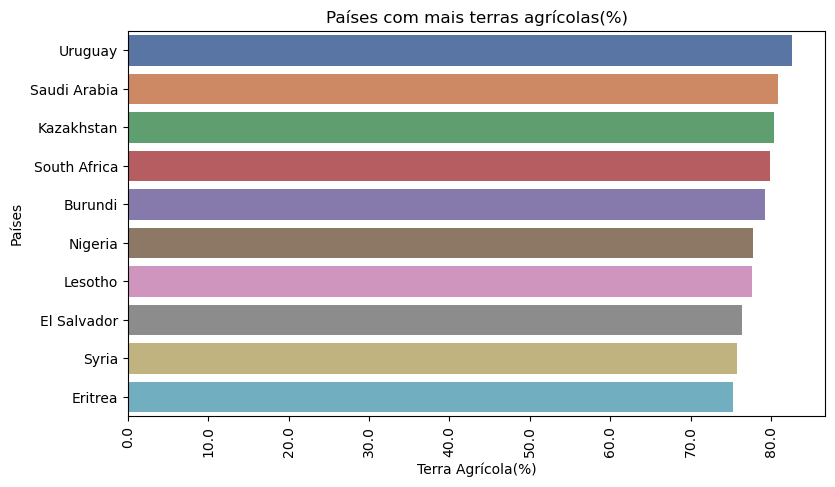

In [16]:
#Importando as bibliotecas para criar o gráfico 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (9,5))

dados_terra_agricola = world_info_df.sort_values(by='Terra Agrícola (%)', ascending=False).head(10)

sns.barplot(x='Terra Agrícola (%)', y='País', data=dados_terra_agricola, palette="deep")

ax.set(xlabel="Terra Agrícola(%)",ylabel="Países",title="Países com mais terras agrícolas(%)")

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.xticks(rotation=90)

plt.show()

Explore correlações entre indicadores econômicos, como o PIB, e vários fatores socioeconômicos.

In [17]:
#Criando uma lista com as colunas que irei usar nesse desafio
base_pergunta2 = world_info_df[['Tamanho das Forças Armadas', 'Emissões de CO2', 'IPC', 
'Variação do IPC (%)', 'Gasoline_Price', 
'PIB ', 'Matrícula bruta no ensino primário (%)', 
'Matrícula bruta no ensino superior (%)', 
'Expectativa de vida', 'Salário Mínimo', 
'Despesas Desembolsadas com Saúde (%)', 'População: Participação na Força de Trabalho (%)', 
'Receita Fiscal (%)', 'Taxa Total de Imposto', 'Taxa de Desemprego']]

In [18]:
#Tratando os valores nulos dessas colunas usando um laço for para passar a média dessas colunas para os valores ausentes nelas
for i in base_pergunta2:
    base_pergunta2 = base_pergunta2.fillna(value=base_pergunta2[i].mean())

base_pergunta2['País'] = world_info_df['País']
base_pergunta2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Tamanho das Forças Armadas                        195 non-null    float64
 1   Emissões de CO2                                   195 non-null    float64
 2   IPC                                               195 non-null    float64
 3   Variação do IPC (%)                               195 non-null    float64
 4   Gasoline_Price                                    195 non-null    float64
 5   PIB                                               195 non-null    float64
 6   Matrícula bruta no ensino primário (%)            195 non-null    float64
 7   Matrícula bruta no ensino superior (%)            195 non-null    float64
 8   Expectativa de vida                               195 non-null    float64
 9   Salário Mínimo       

<Axes: >

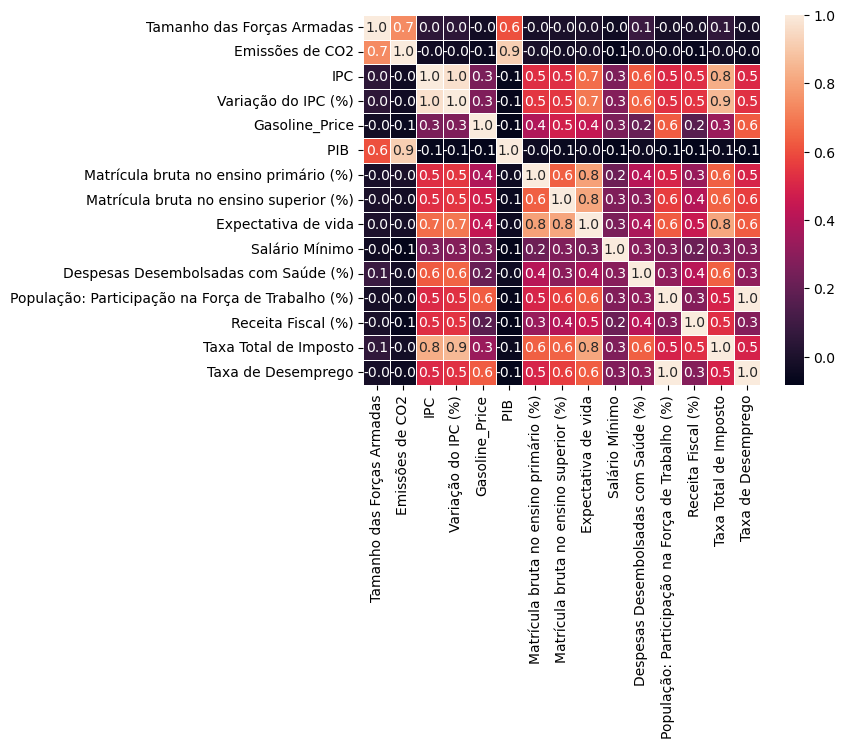

In [19]:
#Criando um gráfico de correlação
correlation = base_pergunta2.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [20]:
#Ordenando os valores das coluna pib e emissões de co2 em ordem decrescente
Emissoes_co2 = base_pergunta2[["País","Emissões de CO2"]].sort_values(by="Emissões de CO2",ascending=False)
PIB_grafico = base_pergunta2[['País', 'PIB ']].sort_values(by='PIB ', ascending = False)

In [21]:
#pegando os 10 maiores valores dessas colunas
maiores_emissoes_co2 = Emissoes_co2[["País","Emissões de CO2"]].head(10).reset_index()
maior_pib = PIB_grafico[["País","PIB "]].head(10).reset_index()

In [22]:
#Atribuindo uma variável nova
maiores_emissoes_co2_paises = maiores_emissoes_co2[["País","Emissões de CO2"]]
maior_pib_pais = maior_pib[["País","PIB "]]

In [23]:
#verificando os resultados
maiores_emissoes_co2_paises

,País,Emissões de CO2
0,China,9893038.0
1,United States,5006302.0
2,India,2407672.0
3,Russia,1732027.0
4,Japan,1135886.0
5,Germany,727973.0
6,Iran,661710.0
7,South Korea,620302.0
8,Saudi Arabia,563449.0
9,Indonesia,563325.0


In [24]:
maior_pib_pais

,País,PIB
0,United States,2.142770e+13
1,China,1.991000e+13
2,Japan,5.081770e+12
3,Germany,3.845630e+12
4,United Kingdom,2.827113e+12
5,France,2.715518e+12
6,India,2.611000e+12
7,South Korea,2.029000e+12
8,Italy,2.001244e+12
9,Brazil,1.839758e+12


Text(0, 0.5, 'Países')

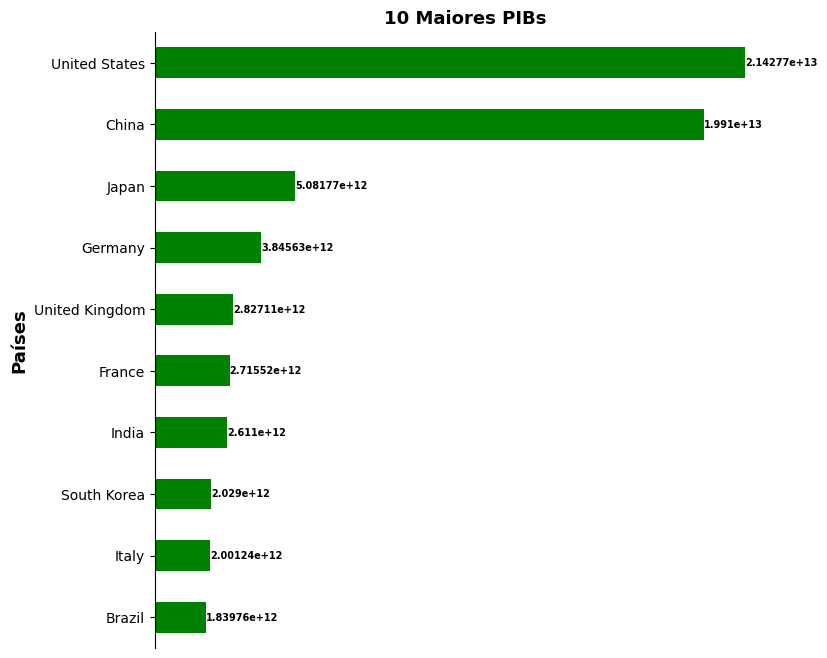

In [25]:
#Criando um gráfico de barras horizontais e fazendo os ajustes paras visualizar os maiores PIBs
ax = maior_pib_pais.sort_index(ascending=False).set_index("País").plot(kind="barh",color="g",legend=False, figsize = (8,8))
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0],fontsize=7, fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xticks([])
plt.title("10 Maiores PIBs", fontsize = 13, fontweight = 'bold')
plt.ylabel("Países", fontsize = 13, fontweight = 'bold')

Text(0, 0.5, 'Países')

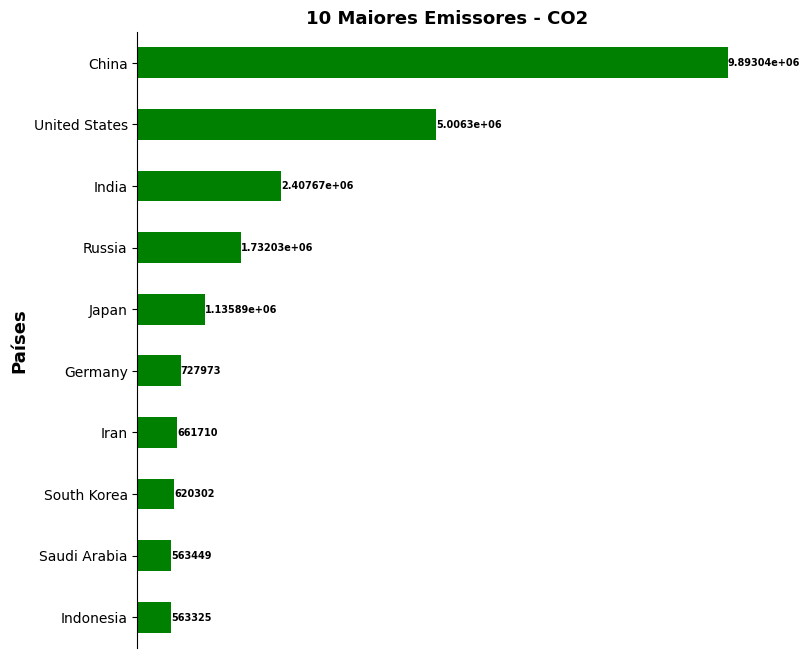

In [26]:
#Criando um gráfico de barras horizontais e fazendo os ajustes paras visualizar os maiores emissores de CO2
ax = maiores_emissoes_co2_paises.sort_index(ascending=False).set_index("País").plot(kind="barh",color="g",legend=False, figsize = (8,8))
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0],fontsize=7, fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.xticks([])
plt.title("10 Maiores Emissores - CO2", fontsize = 13, fontweight = 'bold')
plt.ylabel("Países", fontsize = 13, fontweight = 'bold')

Verificar qual o idioma mais falado

In [27]:
#Buscando os valores nulos e apagando eles da base
nan_index = world_info_df[world_info_df['Idioma Oficial'].isna()].index
world_info_df.drop(nan_index, inplace=True)

In [28]:
#Puxando os 10 idiomas mais falados
idiomas_falados = world_info_df['Idioma Oficial'].value_counts().head(10)
#Fazendo a conta de porcentagem dos idiomas mais falados e passando a função round para arredondar para 2 casas decimais
idiomas_falados = round((idiomas_falados / len(world_info_df['Idioma Oficial'])*100),2)

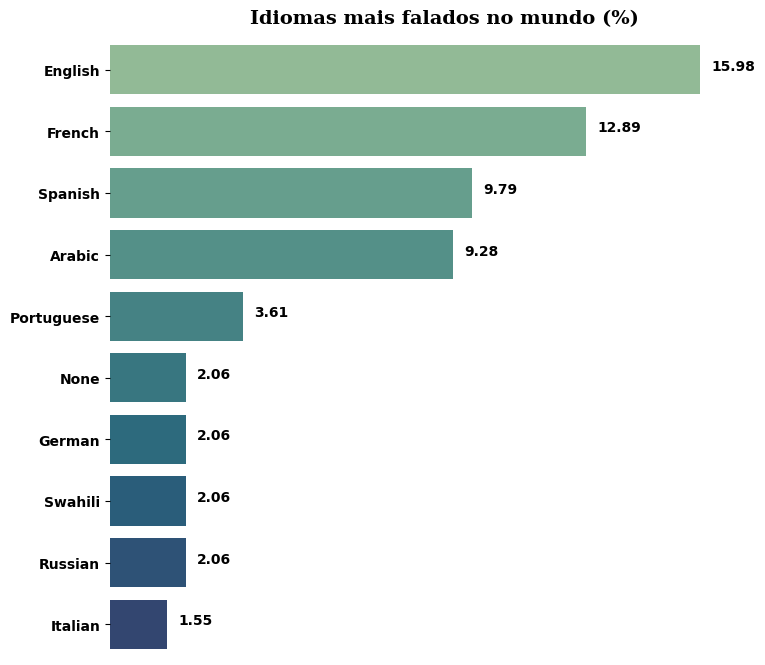

In [29]:
#Criando o gráfico e ajustando ele
x = idiomas_falados.values[:10]
y = idiomas_falados.index[:10]

fig, ax = plt.subplots(figsize=(8, 8))

ax = sns.barplot(x = x,y = y, orient="h", palette=('crest'))

plt.yticks(size=10, fontweight = 'bold')
plt.xticks([])

fig.text(y = 0.90, x= 0.3,s="Idiomas mais falados no mundo (%)",
        fontdict={'family': 'serif',
                'size': 14,
                'weight': 'bold'})

for i, value in enumerate(x):
    ax.text(value + 0.3, i, str(value), size=10, fontweight = 'bold')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.savefig("grafico6.png", dpi=300, bbox_inches='tight')

plt.show()

Analise métricas de saúde, como mortalidade infantil e expectativa de vida, para avaliar o bem-estar geral.


In [30]:
#Pegando as colunas que serão usadas nesse desafio3 e tratando os valores nulos
base_pergunta3 = world_info_df[['Mortalidade Infantil ', 'Expectativa de vida', 'Despesas Desembolsadas com Saúde (%)', 'Médicos por Mil']]
for i in base_pergunta3:
    base_pergunta3 = base_pergunta3.fillna(value=base_pergunta3[i].mean())

<Axes: >

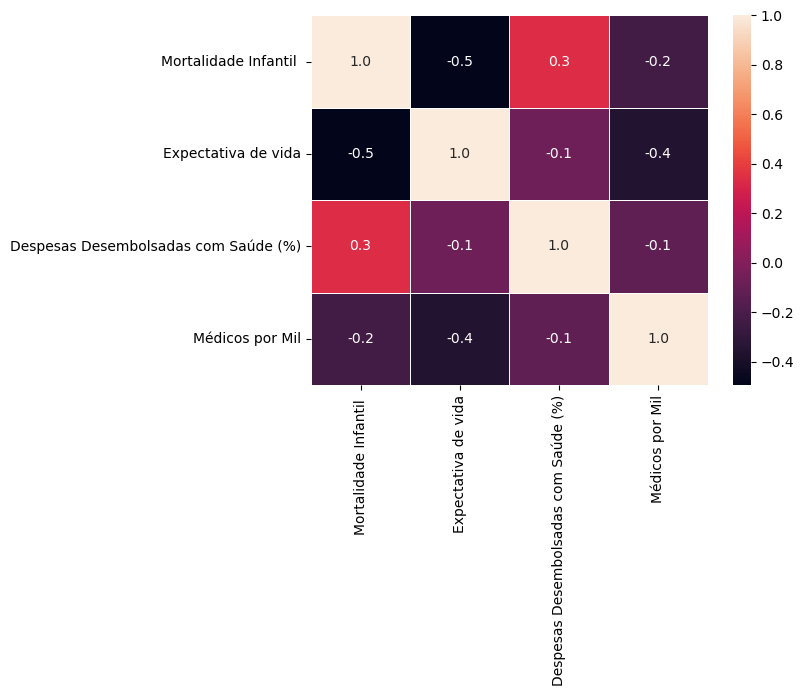

In [31]:
correlation = base_pergunta3.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

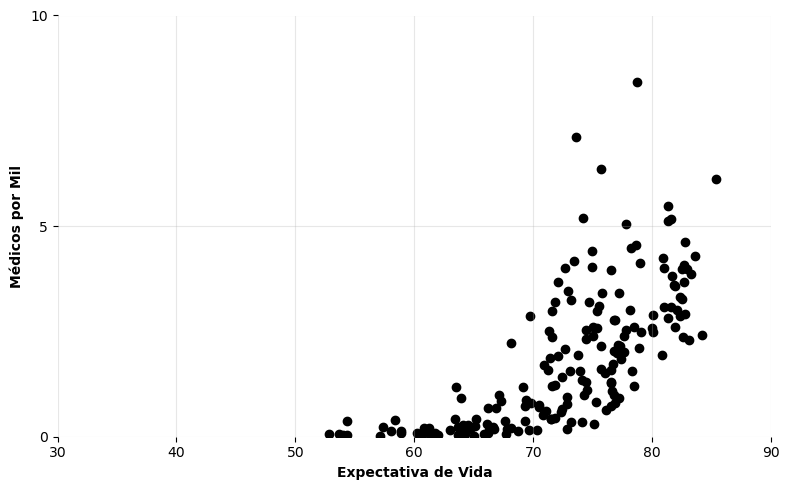

In [32]:
#Criando o gráfico e comprovando que a expectativa de vida depende da quantidade de médicos a cada mil pessoas existe
fig, ax = plt.subplots(figsize = (8,5))

x = base_pergunta3['Expectativa de vida'].values
y = base_pergunta3['Médicos por Mil'].values

ax.scatter(x, y, c= 'black')
ax.set(xticks=np.arange(30, 100, 10), xlim=(30, 90) , yticks=np.arange(0, 15, 5), ylim= (0, 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylabel('Médicos por Mil', fontweight = 'bold', fontsize = 10)
ax.set_xlabel('Expectativa de Vida', fontweight = 'bold', fontsize = 10)

ax.grid(True, alpha = 0.3)
fig.tight_layout()


plt.show()